In [ ]:
import os


def locate_mri_data(directory, extensions=('.nii')):
    # Initialize an empty dictionary to store MRI data file paths with unique keys
    mri_data = {}
    counter = 1  # A counter to assign unique keys to each file found
    
    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        # Iterate through the files in each directory
        for file in files:
            # Check if the file ends with the specified MRI data extension ('.nii)
            if file.endswith(extensions):
                # Store the file path in the dictionary with a unique key
                mri_data[f'data{counter}'] = os.path.join(root, file)
                counter += 1  # Increment the counter to ensure the next file gets a new key
    
    return mri_data  # Return the dictionary containing all located MRI file paths

# Example usage
directory = 'C:/Users/rasmu/miniconda3/envs/home_assignment/home_assignment_data' 
mri_files = locate_mri_data(directory)  # Call the function to locate MRI files in the specified directory

# Access individual files and print their paths
print("Located MRI files:")
for key, file_path in mri_files.items():
    print(f"{key}: {file_path}") 










Located MRI files:
data1: C:/Users/rasmu/miniconda3/envs/home_assignment/home_assignment_data\anatomical.nii
data2: C:/Users/rasmu/miniconda3/envs/home_assignment/home_assignment_data\olfactory_uniformity-test_z_FDR_0.01.nii


Title: Home Assignment
Name: Rasmus Berggren
Date: 18/11/2024
Links: https://neurosynth.org/analyses/terms/olfactory/


This function locates all MRI data files in a specified directory and its subdirectories, filtering files based on the given extensions (default is '.nii').

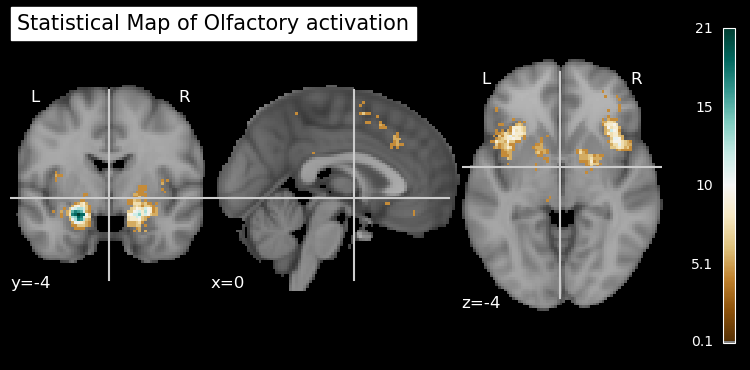

In [ ]:
import nibabel as nib  # Import nibabel to handle NIfTI image files
from nilearn import plotting  # Import nilearn's plotting module for visualizing brain images

# Load the anatomical image using nibabel
anatomical_img = nib.load('C:/Users/rasmu/miniconda3/envs/home_assignment/home_assignment_data/anatomical.nii')

# Load the statistical map image using nibabel
stat_map_img = nib.load('C:/Users/rasmu/miniconda3/envs/home_assignment/home_assignment_data/olfactory_uniformity-test_z_FDR_0.01.nii')

# Plot the statistical map overlaid on the anatomical image
# 'bg_img' specifies the background anatomical image to be used
# 'display_mode' specifies the orientation of the plot
# 'threshold' applies a threshold to the data, here values below 0.1 are excluded
# 'cmap' sets the colormap to be used 
# 'cut_coords' specifies the coordinates in mm to cut the brain image at for visualization
plotting.plot_stat_map(stat_map_img, bg_img=anatomical_img,
                       title="Statistical Map of Olfactory activation",
                       display_mode='ortho', threshold=0.1, cmap="BrBG", cut_coords=(0, -4, -4))

# Show the plot
plotting.show()


This Python script uses nibabel and nilearn to load and visualize a statistical map overlaid on an anatomical brain image. It allows you to explore neuroimaging data by combining structural and functional information.


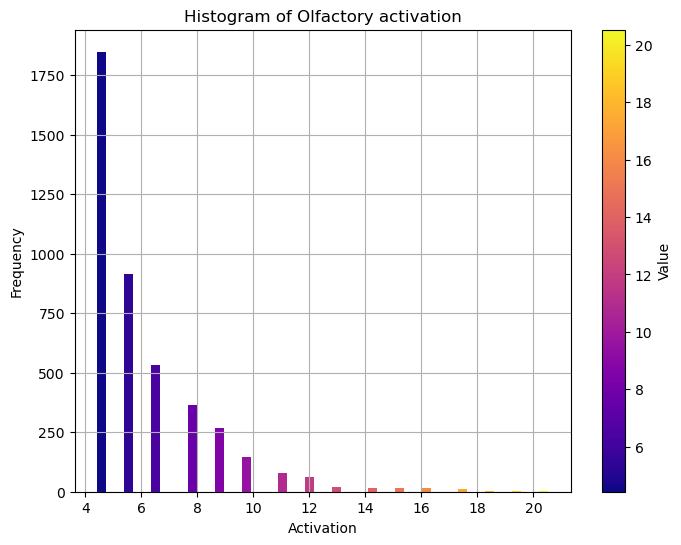

In [ ]:
import nibabel as nib  # Import nibabel for loading NIfTI files
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for array manipulation
from matplotlib import cm  # Import colormap module for creating color gradients

# Load the statistical map image using nibabel
file_path = 'C:/Users/rasmu/miniconda3/envs/home_assignment/home_assignment_data/olfactory_uniformity-test_z_FDR_0.01.nii'
img = nib.load(file_path)  # Load the NIfTI file into a nibabel image object

# Get the data from the NIfTI image (returns a NumPy array)
data = img.get_fdata()

# Filter out non-positive values (we are only interested in positive activation values)
positive_data = data[data > 0]

# Flatten the array for histogram plotting (convert the 3D data into a 1D array)
flattened_data = positive_data.flatten()

# Create a histogram of the positive values
counts, bins = np.histogram(flattened_data, bins=50)  # Get frequency counts and bin edges

# Create a color gradient for the histogram bars based on their bin values
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))  # Normalize bins to a [0, 1] scale
colors = cm.plasma(norm(bins[:-1]))  # Map the normalized bins to the 'plasma' colormap

# Create the histogram plot
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
for i in range(len(counts)):  # Loop over each bin to plot the bars
    ax.bar(bins[i], counts[i], width=bins[i+1] - bins[i], color=colors[i], align='edge')

# Set the title and axis labels for the plot
ax.set_title('Histogram of Olfactory activation')  # Title of the plot
ax.set_xlabel('Activation')  # X-axis label (activation values)
ax.set_ylabel('Frequency')  # Y-axis label (how many times each activation level occurs)

# Add a color bar to indicate the value-to-color mapping
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)  # ScalarMappable object for the color bar
sm.set_array([])  # Set the array for the color bar (empty as it's just for reference)
cbar = plt.colorbar(sm, ax=ax)  # Add color bar to the plot
cbar.set_label('Value')  # Label for the color bar

# Display grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()


This Python script visualizes the distribution of positive activation values from a NIfTI file (statistical map) as a histogram. The bars of the histogram are colored based on their activation value, using a color gradient to enhance the visualization.
